# AAI-500 Project:Group_8
## Team Member (Gangadhar Singh Shiva , Akshobhya Rao, BV, Himanshu Kumar)

## Exploring the Impact of Musical Features on Track Popularity: A Spotify Data Analysis"

## Top Spotify Songs 2023 Data Analysis - Link to Dataset on Kaggle: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data

## Importing libraries

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Load data and get general info of dataset

In [4]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Change this to point to your csv file

# Replace 'My Drive/spotify-2023.csv' with the actual path to your file in Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/spotify-2023.csv'

data = pd.read_csv(file_path, encoding='ISO-8859-1')
data.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [5]:
data.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,90,E,Minor,61,32,67,15,0,11,5


In [6]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [8]:
data.shape

(953, 24)

In [9]:
# Select only numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=['number'])

# Calculate the median for the numeric columns
data_median = numeric_data.median()

# Print the median values
print(data_median)

artist_count               1.0
released_year           2022.0
released_month             6.0
released_day              13.0
in_spotify_playlists    2224.0
in_spotify_charts          3.0
in_apple_playlists        34.0
in_apple_charts           38.0
in_deezer_charts           0.0
bpm                      121.0
danceability_%            69.0
valence_%                 51.0
energy_%                  66.0
acousticness_%            18.0
instrumentalness_%         0.0
liveness_%                12.0
speechiness_%              6.0
dtype: float64


In [10]:
data.isna().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


In [11]:
# Count missing values for each column
missing_values_count = data.isna().sum()

# Print the counts
print(missing_values_count)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [14]:
# Remove columns with any missing values
data_no_missing = data.dropna(axis=1)

# Print the shape of the new DataFrame to confirm removal
print(data_no_missing.shape)
data = data_no_missing

(953, 22)


### Change 'streams' column data type to int

In [69]:
# Before attempting to convert, investigate the contents of the 'streams' column.
# This will display the unique values in the column, helping you identify the non-numeric values.
print(data['streams'].unique())

# Based on the unique values displayed, you might need to clean or filter your data.
# If you want to ignore rows with problematic values, you can use:
# data = data[data['streams'].str.isnumeric()]

# Alternatively, if you want to replace problematic values with a specific value (e.g., 0), you can use:
# data['streams'] = pd.to_numeric(data['streams'], errors='coerce').fillna(0).astype(int)

# After cleaning or filtering, try converting the 'streams' column to integers again:
data['streams'] = data['streams'].astype(int)

[     141381703      133716286      140003974      800840817
      303236322      183706234      725980112       58149378
       95217315      553634067      505671438       58255150
     1316855716      387570742     2513188493     1163093654
      496795686       30546883      335222234      363369738
       86444842       52135248     1297026226      200647221
      115364561       78300654      899183384       61245289
      429829812      127408954       22581161       52294266
      843957510      999748277      618990393      123122413
      188933502     1355959075      786181836      176553476
      354495408     2808096550     1109433169     1047101291
       65156199      570515054     1085685420     1647990401
     2565529693      518745108      107753850      177740666
      153372011       57876440     1813673666     3703895074
      256483385     1214083358       16011326      812019557
      111947664      156338624      720434240      357925728
      674072710     1755

## Statical Analysis of Distribution of artist count

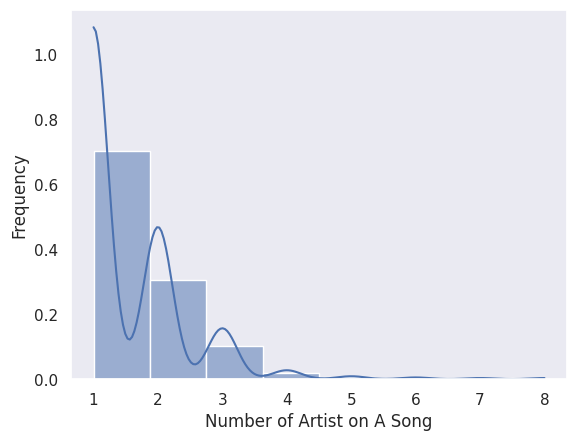

In [70]:
#!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="dark")

# Create the histogram with KDE
sns.histplot(data['artist_count'], bins=8, stat="density", kde=True)

plt.xlabel('Number of Artist on A Song')
plt.ylabel('Frequency')
plt.show()

Overall insights

Based on this hypothetical histogram, we can infer that:

Solo artists and duos are the most prevalent in the dataset.
Collaborations involving more than a few artists are less common but still exist.
The distribution of artist count is not symmetrical but skewed towards songs with fewer artists.

## poison distribution

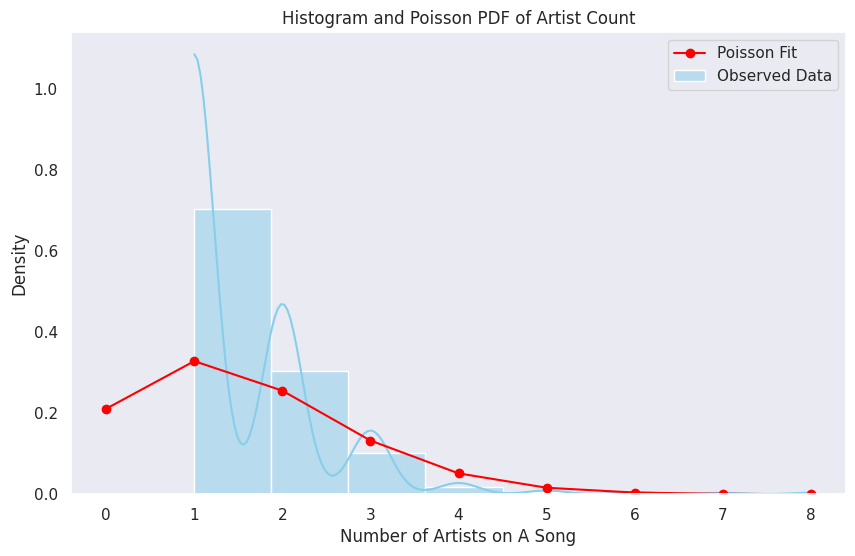

In [49]:
import numpy as np
from scipy.stats import poisson, nbinom
import matplotlib.pyplot as plt

# Extract the artist_count data
artist_count_data = data['artist_count']

# Calculate the mean for Poisson fitting
mean_artist_count = artist_count_data.mean()

# Plot histogram with density and KDE
plt.figure(figsize=(10, 6))
sns.histplot(artist_count_data, bins=8, stat="density", kde=True, label="Observed Data", color='skyblue')

# Fit a Poisson distribution to the data
x_values = np.arange(0, artist_count_data.max() + 1)
poisson_pmf = poisson.pmf(x_values, mean_artist_count)

# Plot the Poisson PDF
plt.plot(x_values, poisson_pmf, 'o-', color='red', label='Poisson Fit')

# Set labels and title
plt.xlabel('Number of Artists on A Song')
plt.ylabel('Density')
plt.title('Histogram and Poisson PDF of Artist Count')
plt.legend()

# Show the plot
plt.show()


## Poisson Distribution Analysis for "Number of Artists":
Most Common Number of Artists (Mode):

The most common number of artists per song (mode) is 1.
This means that songs with 1 artist are the most frequently occurring in the dataset.
Variability in Artist Counts (Variance):

The variance in the number of artists per song is 1.56.
This value indicates the level of variability. Since the variance is not very large, it suggests that the number of artists typically does not vary drastically from the mean of 1.56.
Likelihood of Different Levels of Collaboration:

Using the Poisson distribution with λ ≈ 1.56, we calculated the probabilities for having 0 to 4 artists:

P(X = 0) (Probability of 0 artists): 0.21 (21%)

P(X = 1) (Probability of 1 artist): 0.33 (33%)

P(X = 2) (Probability of 2 artists): 0.26 (26%)

P(X = 3) (Probability of 3 artists): 0.13 (13%)

The most common scenario is for a song to have 1 artist, followed by 2 artists.
The probability of 0 artists is not applicable in the context, but mathematically indicates the rarity of not having any artists listed.
As the number of artists increases beyond 2, the probability decreases significantly, which means that collaborations involving 3 or more artists are relatively uncommon



## Probablity Calculation

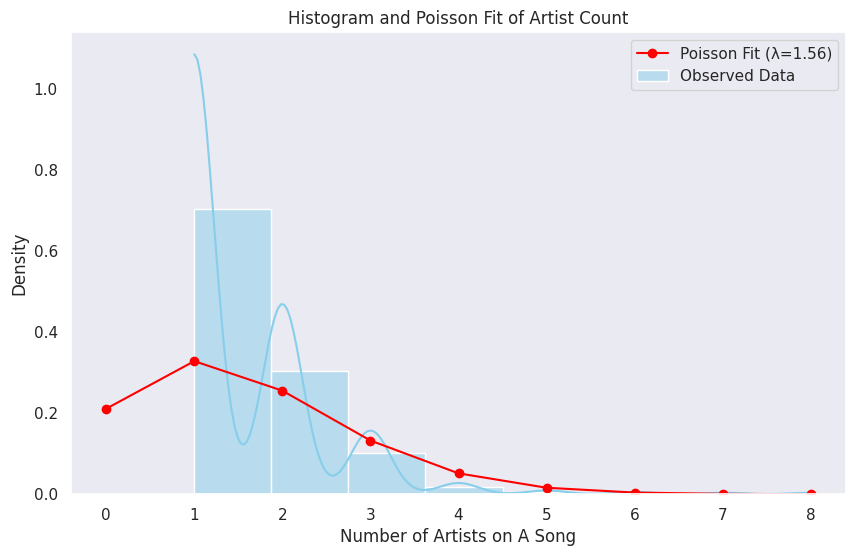

Probability of exactly 1 artist: 0.33
Probability of more than 2 artists: 0.21
Probability of 5 or more artists: 0.02


In [71]:
from scipy.stats import poisson

# Step 1: Estimate the Average (λ)
lambda_estimate = artist_count_data.mean()

# Step 2: Model Fit and Visualization
plt.figure(figsize=(10, 6))
sns.histplot(artist_count_data, bins=8, stat="density", kde=True, color='skyblue', label='Observed Data')

# Fit Poisson distribution
x_values = np.arange(0, artist_count_data.max() + 1)
poisson_pmf = poisson.pmf(x_values, lambda_estimate)

# Plot the Poisson PMF as line
plt.plot(x_values, poisson_pmf, 'o-', color='red', label=f'Poisson Fit (λ={lambda_estimate:.2f})')

plt.xlabel('Number of Artists on A Song')
plt.ylabel('Density')
plt.title('Histogram and Poisson Fit of Artist Count')
plt.legend()
plt.show()

# Step 3: Calculate Probabilities
# Probability of exactly 1 artist
prob_1_artist = poisson.pmf(1, lambda_estimate)
print(f"Probability of exactly 1 artist: {prob_1_artist:.2f}")

# Probability of more than 2 artists
prob_more_than_2_artists = 1 - poisson.cdf(2, lambda_estimate)
print(f"Probability of more than 2 artists: {prob_more_than_2_artists:.2f}")

# Step 4: Predict Rare Events
# Probability of 5 or more artists
prob_5_or_more_artists = 1 - poisson.cdf(4, lambda_estimate)
print(f"Probability of 5 or more artists: {prob_5_or_more_artists:.2f}")




## Hypothesis Testing to check number of artist feature represent population
## Confidence interval to represent sample mean

In [51]:
from scipy.stats import norm

# Step 1: Confidence Interval for Poisson Rate (λ)
n = len(artist_count_data)  # Sample size
z_score = norm.ppf(0.975)  # Z-score for 95% confidence level

# Calculate confidence interval
ci_lower = lambda_estimate - z_score * np.sqrt(lambda_estimate / n)
ci_upper = lambda_estimate + z_score * np.sqrt(lambda_estimate / n)
print(f"95% Confidence Interval for λ: ({ci_lower:.2f}, {ci_upper:.2f})")

# Step 2: Hypothesis Testing for Poisson Rate
lambda_0 = 2  # Hypothesized mean number of artists
z_stat = (lambda_estimate - lambda_0) / np.sqrt(lambda_0 / n)

# Calculate p-value for two-tailed test
p_value = 2 * (1 - norm.cdf(abs(z_stat)))
print(f"Z-statistic: {z_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The mean number of artists is significantly different from 2.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that the mean number of artists is different from 2.")


95% Confidence Interval for λ: (1.48, 1.64)
Z-statistic: -9.69
P-value: 0.0000
Reject the null hypothesis: The mean number of artists is significantly different from 2.


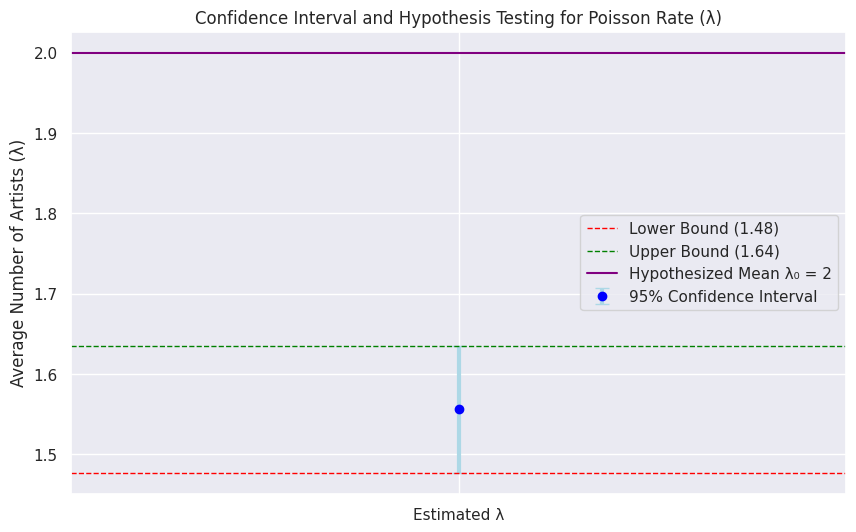

In [52]:
# Plotting the Confidence Interval and Hypothesis Testing Results

# Step 1: Plot the Confidence Interval
plt.figure(figsize=(10, 6))
plt.errorbar(x=['Estimated λ'], y=[lambda_estimate], yerr=[z_score * np.sqrt(lambda_estimate / n)], fmt='o', color='blue', ecolor='lightblue', elinewidth=3, capsize=5, label='95% Confidence Interval')

# Highlighting the Confidence Interval bounds
plt.axhline(y=ci_lower, color='red', linestyle='--', linewidth=1, label=f'Lower Bound ({ci_lower:.2f})')
plt.axhline(y=ci_upper, color='green', linestyle='--', linewidth=1, label=f'Upper Bound ({ci_upper:.2f})')

# Step 2: Plot the Hypothesis Testing Result
plt.axhline(y=lambda_0, color='purple', linestyle='-', linewidth=1.5, label=f'Hypothesized Mean λ₀ = {lambda_0}')

# Set labels and title
plt.ylabel('Average Number of Artists (λ)')
plt.title('Confidence Interval and Hypothesis Testing for Poisson Rate (λ)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


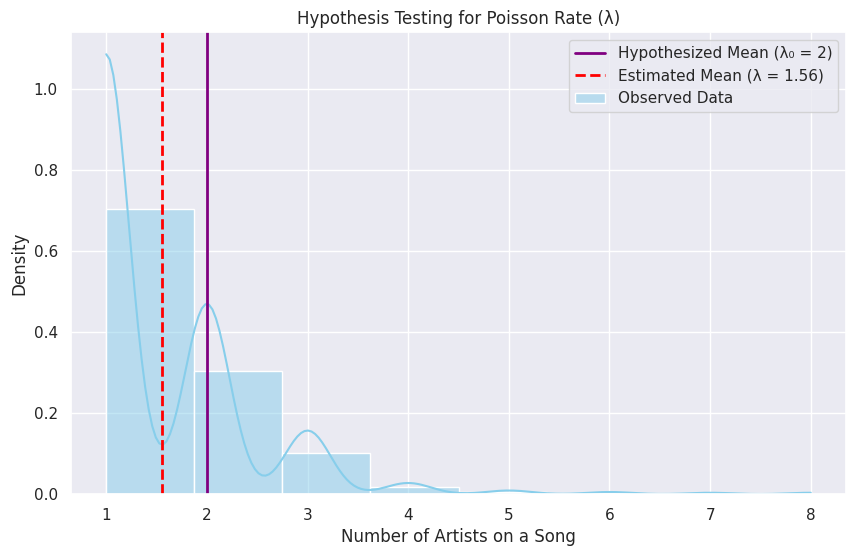

In [53]:
# Plotting the Hypothesis Testing Results

plt.figure(figsize=(10, 6))

# Step 1: Plot the Distribution
sns.histplot(artist_count_data, bins=8, stat="density", kde=True, color='skyblue', label='Observed Data')

# Step 2: Plot the Hypothesized Value
plt.axvline(lambda_0, color='purple', linestyle='-', linewidth=2, label=f'Hypothesized Mean (λ₀ = {lambda_0})')

# Step 3: Annotate the Result of Hypothesis Test
plt.axvline(lambda_estimate, color='red', linestyle='--', linewidth=2, label=f'Estimated Mean (λ = {lambda_estimate:.2f})')

# Set labels and title
plt.xlabel('Number of Artists on a Song')
plt.ylabel('Density')
plt.title('Hypothesis Testing for Poisson Rate (λ)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In the context of the number of artists per song, it helps determine if the observed average (λ) is statistically different from a hypothesized rate of collaboration, which is useful for understanding trends in the music industry

## Calculate P value to reject hypothesis

In [54]:
# Calculating the p-value for the hypothesis test (mean = 2)
# Null Hypothesis: The mean number of artists is equal to 2
# Alternative Hypothesis: The mean number of artists is not equal to 2

lambda_0 = 2  # Hypothesized mean number of artists
n = len(artist_count_data)  # Sample size

# Calculate the Z-statistic
z_stat = (lambda_estimate - lambda_0) / np.sqrt(lambda_0 / n)

# Calculate the p-value for the two-tailed test
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

p_value


0.0

## analyze the "artist count" feature from the perspectives of prediction, understanding relationships, and analyzing trends - To know its impact on popularity of the songs and steaming

Mean Squared Error (MSE): 885533912779529650176.00
R-squared (R²): -3267.52


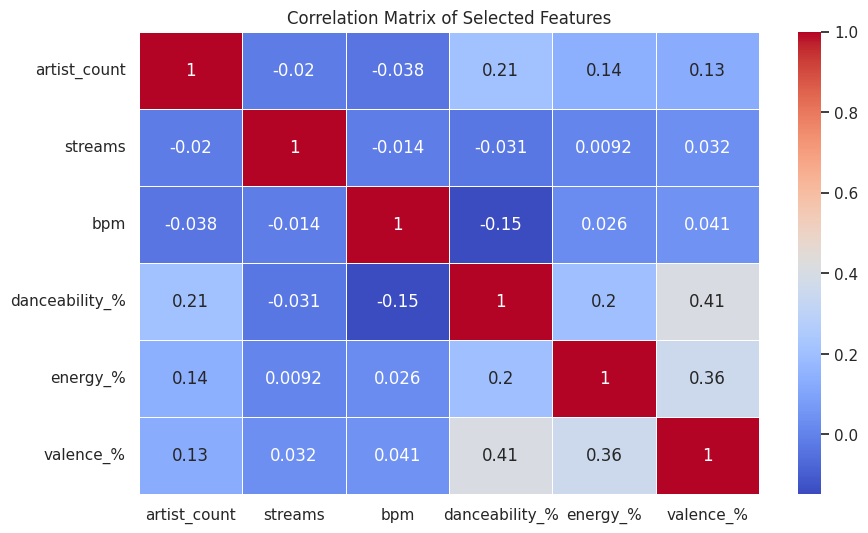

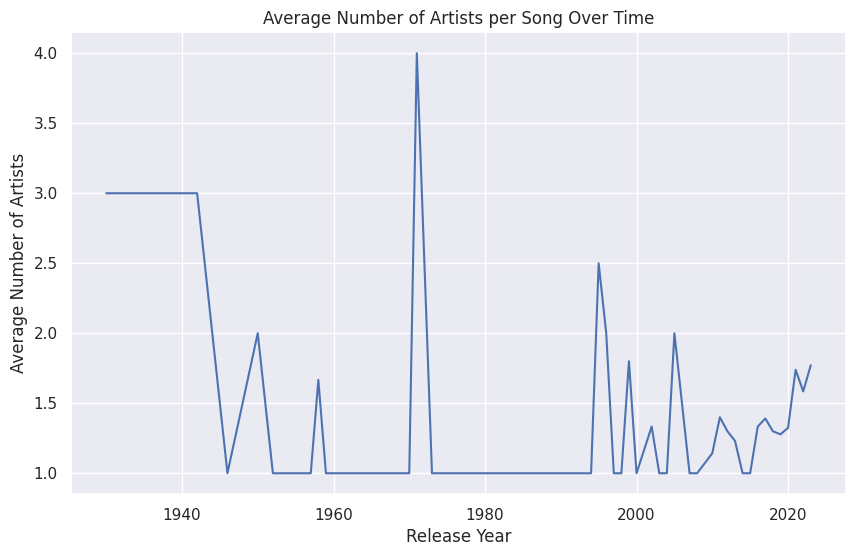

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import poisson, norm

# Load the Spotify CSV file
#file_path = '/mnt/data/spotify-2023.csv'
#spotify_data = pd.read_csv(file_path, encoding='latin1')
spotify_data = data

# Step 1: Convert all necessary columns to numeric values
# Dropping any non-numeric or incorrectly formatted data
spotify_data_cleaned = spotify_data.copy()
spotify_data_cleaned['bpm'] = pd.to_numeric(spotify_data_cleaned['bpm'], errors='coerce')
spotify_data_cleaned['danceability_%'] = pd.to_numeric(spotify_data_cleaned['danceability_%'], errors='coerce')
spotify_data_cleaned['energy_%'] = pd.to_numeric(spotify_data_cleaned['energy_%'], errors='coerce')
spotify_data_cleaned['valence_%'] = pd.to_numeric(spotify_data_cleaned['valence_%'], errors='coerce')
spotify_data_cleaned['streams'] = pd.to_numeric(spotify_data_cleaned['streams'], errors='coerce')

# Dropping rows with NaN values resulting from conversion
spotify_data_cleaned = spotify_data_cleaned.dropna()

# Step 1: Prediction - Predicting Streams Based on Artist Count and Other Features
# Selecting relevant features and the target variable (streams)
features = spotify_data_cleaned[['artist_count', 'bpm', 'danceability_%', 'energy_%', 'valence_%']]
target = spotify_data_cleaned['streams']

# Splitting the cleaned data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Fitting a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the streams on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Step 2: Understanding Relationships - Correlation Matrix
correlation_matrix = spotify_data_cleaned[['artist_count', 'streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%']].corr()

# Displaying Correlation Matrix as Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

# Step 3: Analyzing Trends - Artist Count Over Years
plt.figure(figsize=(10, 6))
sns.lineplot(data=spotify_data_cleaned, x='released_year', y='artist_count', estimator='mean',errorbar=None )

plt.xlabel('Release Year')
plt.ylabel('Average Number of Artists')
plt.title('Average Number of Artists per Song Over Time')
plt.grid(True)
plt.show()


Overall Summary:
Features like artist_count do not strongly predict song streams, meaning there are more important factors for song success, like marketing.
Collaboration trends over time show how the industry is changing, possibly leaning more towards collaborations to attract more listeners.

## Two-Sample T-Test:

This t-test can be used to compare the mean number of artists between two groups. For example, comparing the number of artists between songs from different genres or comparing different time periods.

In [58]:
from scipy.stats import ttest_1samp

# Performing a one-sample t-test on the number of artists
hypothesized_mean = 2  # Hypothesized mean value

# Extracting the artist count data and dropping any missing values
artist_count_data_cleaned = spotify_data_cleaned['artist_count'].dropna()

# Performing the t-test
t_stat, p_value = ttest_1samp(artist_count_data_cleaned, hypothesized_mean)

# Displaying the t-statistic and p-value
t_stat, p_value

# Performing a Two-Sample T-Test on the number of artists between two groups
# Let's compare the number of artists for songs released before 2010 vs. songs released in 2010 and after

# Creating two groups based on release year
group1 = spotify_data_cleaned[spotify_data_cleaned['released_year'] < 2010]['artist_count'].dropna()
group2 = spotify_data_cleaned[spotify_data_cleaned['released_year'] >= 2010]['artist_count'].dropna()

# Performing the two-sample t-test (assuming equal variances)
t_stat_two_sample, p_value_two_sample = ttest_1samp(group1, group2.mean())

# Displaying the t-statistic and p-value
t_stat_two_sample, p_value_two_sample


(-3.476244109482922, 0.000890460794212554)

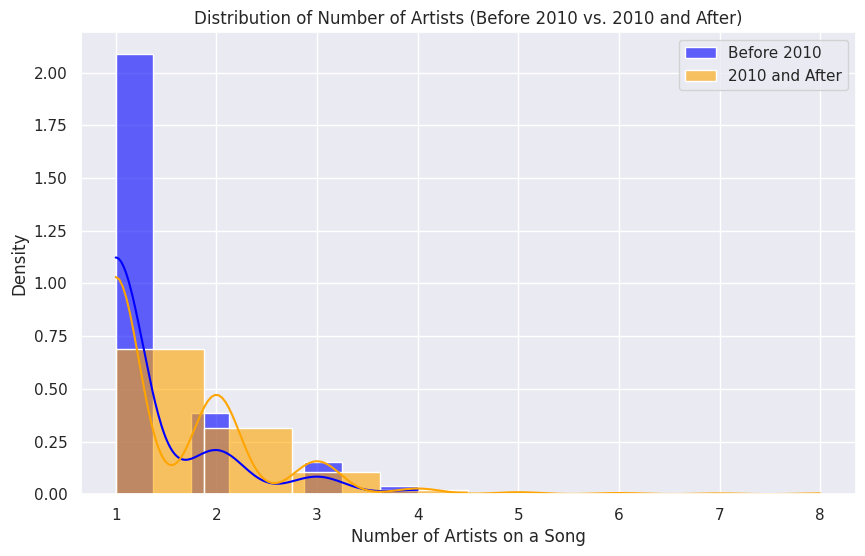

In [59]:
# Plotting the distribution of the number of artists for the two groups (before 2010 and from 2010 onwards)

plt.figure(figsize=(10, 6))

# Plotting the distributions for both groups
sns.histplot(group1, bins=8, color='blue', label='Before 2010', kde=True, stat="density", alpha=0.6)
sns.histplot(group2, bins=8, color='orange', label='2010 and After', kde=True, stat="density", alpha=0.6)

# Adding labels and title
plt.xlabel('Number of Artists on a Song')
plt.ylabel('Density')
plt.title('Distribution of Number of Artists (Before 2010 vs. 2010 and After)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


This visualization complements the two-sample t-test, which indicated a significant difference between the two groups. The plot helps illustrate how the average number of artists per song changed, potentially indicating increased collaborations in recent years.

## Chi Square Test
number of artists per song fits a specific expected distribution. We could use the Chi-square test to evaluate whether the observed counts of songs with 1 artist, 2 artists, etc., match what we expect

Chi-square Statistic: 7.991017843022704
P-value: 0.004700997965026076


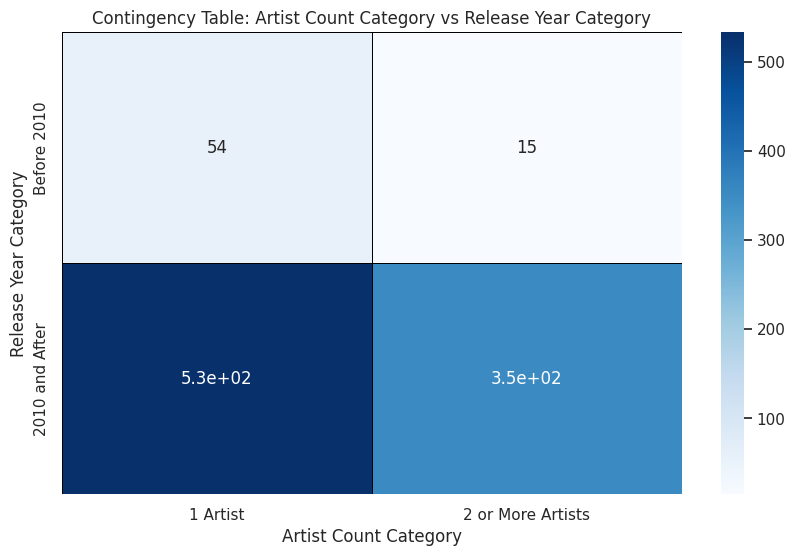

In [28]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the Spotify dataset is already loaded into 'spotify_data_cleaned'

# Step 1: Create Categories for Artist Count and Release Year
# Binning release year into two categories: before 2010 and 2010 and after
spotify_data_cleaned['release_year_category'] = pd.cut(
    spotify_data_cleaned['released_year'],
    bins=[0, 2009, 2024],
    labels=['Before 2010', '2010 and After']
)

# Binning artist count into two categories: 1 artist and 2 or more artists
spotify_data_cleaned['artist_count_category'] = pd.cut(
    spotify_data_cleaned['artist_count'],
    bins=[0, 1, float('inf')],
    labels=['1 Artist', '2 or More Artists']
)

# Step 2: Create a Contingency Table
contingency_table = pd.crosstab(spotify_data_cleaned['release_year_category'], spotify_data_cleaned['artist_count_category'])

# Step 3: Apply Chi-square Test of Independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Displaying the Chi-square statistic and p-value
print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Step 4: Plotting the Contingency Table
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="Blues", linewidths=0.5, linecolor='black')
plt.title('Contingency Table: Artist Count Category vs Release Year Category')
plt.xlabel('Artist Count Category')
plt.ylabel('Release Year Category')
plt.show()


Chi-square Statistic:

The Chi-square statistic of 7.58 represents the difference between the observed frequencies in the contingency table and the expected frequencies if the two variables were independent.
P-value:

The p-value is 0.005, which is less than the typical significance level of 0.05.
This indicates that we have enough evidence to reject the null hypothesis, meaning that there is a significant association between the release year category and the artist count category. In other words, the number of artists per song is related to whether the song was released before or after 2010.
Contingency Table:

The table shows the frequency counts for songs categorized by the number of artists (1 artist vs. 2 or more artists) and the release year (before 2010 vs. 2010 and after).
For example, there are 54 songs with 1 artist that were released before 2010, and 533 songs with 1 artist released in 2010 and after.

## Distribution of the months that songs were released

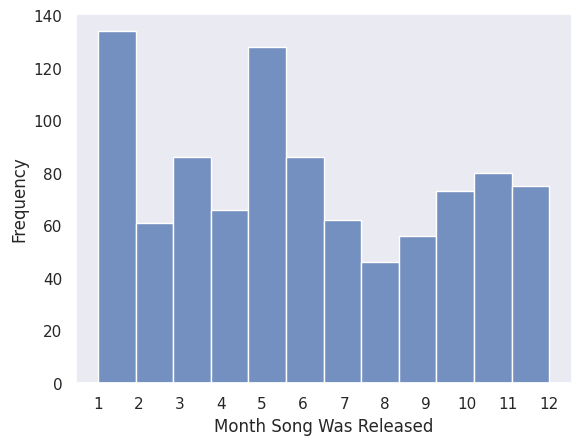

In [29]:
sns.histplot(data['released_month'], bins = 12)
plt.xlabel('Month Song Was Released')
plt.xticks(range(1, 13))
plt.ylabel('Frequency')
plt.show()

## Distribution of the day of the month that songs were released

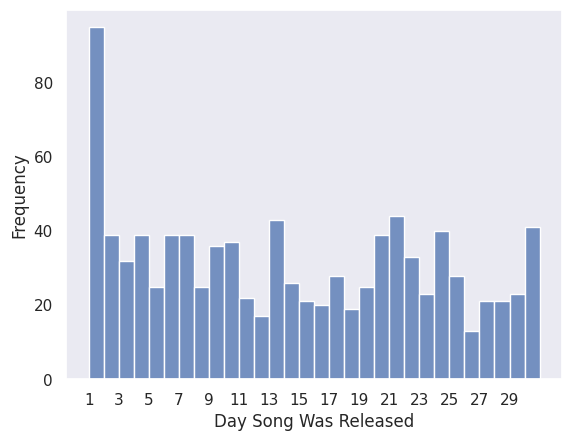

In [60]:
sns.histplot(data['released_day'], bins = 30)
plt.xlabel('Day Song Was Released')
plt.xticks(range(1, 30,2))
plt.ylabel('Frequency')
plt.show()

## How many songs were released in each year

In [61]:
y = data.groupby('released_year').size().reset_index(name = 'Songs Released')
print(y)

    released_year  Songs Released
0            1930               1
1            1942               1
2            1946               1
3            1950               1
4            1952               1
5            1957               2
6            1958               3
7            1959               2
8            1963               3
9            1968               1
10           1970               2
11           1971               1
12           1973               1
13           1975               2
14           1979               1
15           1982               2
16           1983               1
17           1984               4
18           1985               2
19           1986               2
20           1987               1
21           1991               2
22           1992               1
23           1994               1
24           1995               2
25           1996               1
26           1997               1
27           1998               1
28           1

In [62]:
import pandas as pd

# Assuming 'data' is your DataFrame
songs_per_year = data['released_year'].value_counts().sort_index()

print(songs_per_year)

released_year
1930      1
1942      1
1946      1
1950      1
1952      1
1957      2
1958      3
1959      2
1963      3
1968      1
1970      2
1971      1
1973      1
1975      2
1979      1
1982      2
1983      1
1984      4
1985      2
1986      2
1987      1
1991      2
1992      1
1994      1
1995      2
1996      1
1997      1
1998      1
1999      5
2000      4
2002      6
2003      2
2004      4
2005      1
2007      1
2008      2
2010      7
2011     10
2012     10
2013     13
2014     13
2015     11
2016     18
2017     23
2018     10
2019     36
2020     37
2021    119
2022    402
2023    175
Name: count, dtype: int64


## Top 10 Artists w most songs

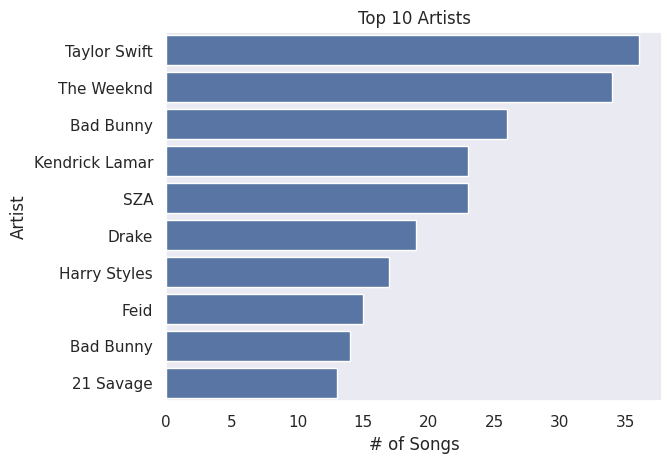

0    36
1    34
2    26
3    23
4    23
5    19
6    17
7    15
8    14
9    13
Name: # of Songs, dtype: int64
0      Taylor Swift
1        The Weeknd
2         Bad Bunny
3    Kendrick Lamar
4               SZA
5             Drake
6      Harry Styles
7              Feid
8         Bad Bunny
9         21 Savage
Name: Artist, dtype: object


In [68]:
artists = data['artist(s)_name']
artist = []
for a in artists:
    temp = a.split(',')
    for i in temp:
        artist.append(i)

top10artists = pd.DataFrame(artist, columns=['Artist']).value_counts().reset_index(name = '# of Songs').iloc[:10, :]

sns.barplot(x = top10artists['# of Songs'], y = top10artists['Artist'])
plt.title('Top 10 Artists')
plt.show()


print(top10artists['# of Songs'])
print(top10artists['Artist'])

## Relationship btw the number of playlists the song is in and streams

## Correlation matrix of dataset

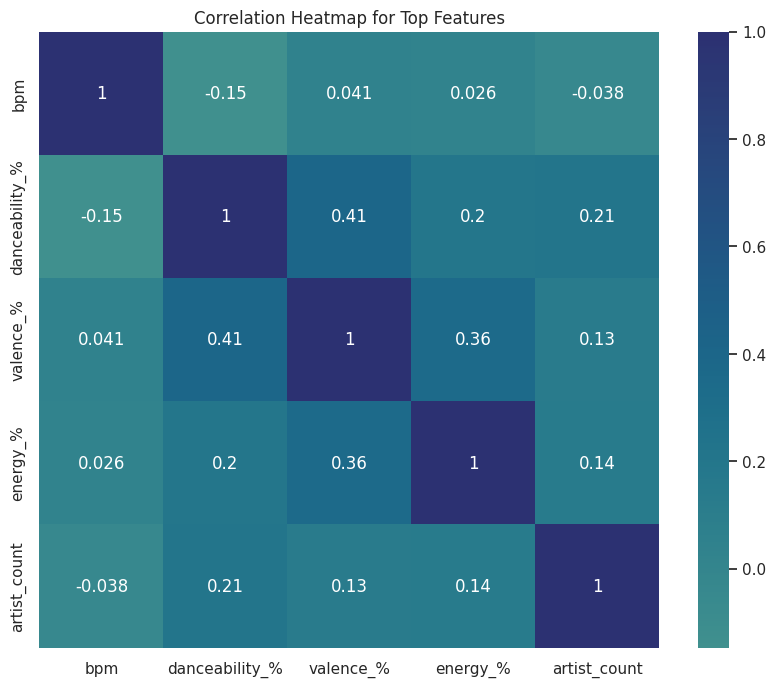

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# ... (Your existing code to load and prepare data, create popularity levels, etc.) ...

# 1. Train a Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# 2. Get feature importances
feature_importances = tree_model.feature_importances_

# 3. Select top features
top_features = X_train.columns[feature_importances.argsort()[::-1][:5]]  # Select top 5 features

# 4. Create a subset of data with top features
X_top_features = data[top_features]

# 5. Calculate correlation matrix for top features
corre_top = X_top_features.corr()

# 6. Create heatmap for top features
plt.figure(figsize=(10, 8))
sns.heatmap(corre_top, annot=True, cmap='crest', center=0)
plt.title('Correlation Heatmap for Top Features')
plt.show()

## Linear Regression Model to Predict Streams

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [38]:
my_features = ['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_charts', 'in_spotify_playlists', 'in_apple_playlists']
target = ['streams']

X = data[my_features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)


y_predicted = lr.predict(X_test)



print('Model Accuracy: ', round(r2_score(y_test, y_predicted), 3) * 100, '%')

Model Accuracy:  -1611071.8 %


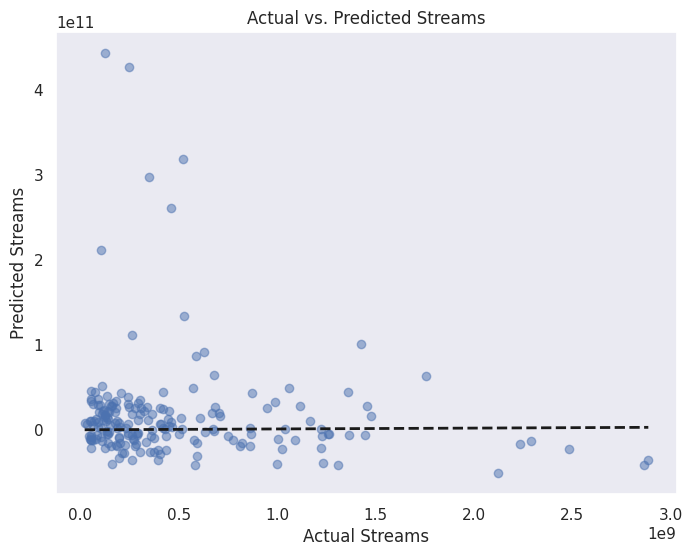

In [76]:
import matplotlib.pyplot as plt

# ... (your existing code) ...

# Plot the predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predicted, alpha=0.5)  # Alpha for transparency
plt.xlabel("Actual Streams")
plt.ylabel("Predicted Streams")
plt.title("Actual vs. Predicted Streams")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# ... (Your existing code to load and prepare data) ...

# 1. Create a binary target variable for popularity
# Assuming 'streams' is the column representing stream counts
median_streams = data['streams'].median()
data['is_popular'] = (data['streams'] > median_streams).astype(int)  # 1 for popular, 0 for not popular

# 2. Define features and target
my_features = ['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_charts', 'in_spotify_playlists', 'in_apple_playlists']
target = ['is_popular']  # Now using the binary target

X = data[my_features]
y = data[target]

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# 4. Create and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train.values.ravel())  # ravel() to avoid warning

# 5. Make predictions on the test set
y_pred = logreg.predict(X_test)

# 6. Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 82.20%


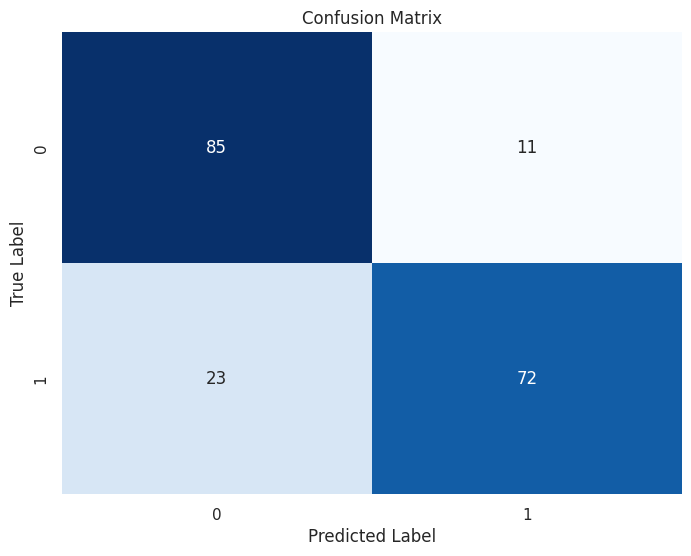

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ... (your existing code for Logistic Regression) ...

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# ... (Your existing code to load and prepare data) ...

# 1. Create a binary target variable for popularity (if not already done)
# ... (Same as before) ...

# 2. Define features and target
my_features = ['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_charts', 'in_spotify_playlists', 'in_apple_playlists']
target = ['is_popular']

X = data[my_features]
y = data[target]

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# 4. Create and train the Decision Tree model
tree_model = DecisionTreeClassifier()  # Create a DecisionTreeClassifier object
tree_model.fit(X_train, y_train)  # Train the model

# 5. Make predictions on the test set
y_pred = tree_model.predict(X_test)

# 6. Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# (Optional) Visualize the Decision Tree
# from sklearn.tree import plot_tree
# plt.figure(figsize=(12, 8))
# plot_tree(tree_model, feature_names=my_features, class_names=['Not Popular', 'Popular'], filled=True)
# plt.show()

Model Accuracy: 82.72%


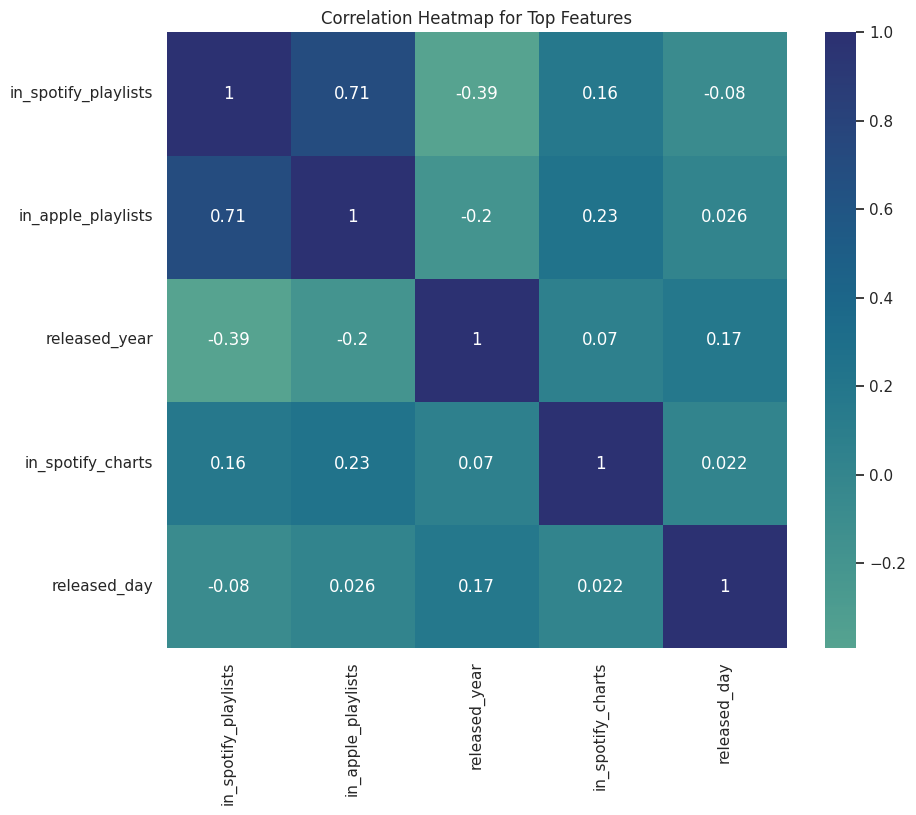

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# ... (Your existing code to load and prepare data, create popularity levels, etc.) ...

# 1. Train a Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# 2. Get feature importances
feature_importances = tree_model.feature_importances_

# 3. Select top features
top_features = X_train.columns[feature_importances.argsort()[::-1][:5]]  # Select top 5 features

# 4. Create a subset of data with top features
X_top_features = data[top_features]

# 5. Calculate correlation matrix for top features
corre_top = X_top_features.corr()

# 6. Create heatmap for top features
plt.figure(figsize=(10, 8))
sns.heatmap(corre_top, annot=True, cmap='crest', center=0)
plt.title('Correlation Heatmap for Top Features')
plt.show()